In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
result_df = pd.read_pickle("./result_df.pkl")

In [27]:
result_df[result_df['config/params/sigma']>=100_000]

,mse,rmse,mae,r2,r2_abs,smape,rse,rrse,pred_nan_sum,timestamp,...,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/params/C,config/params/kernel,config/params/sigma,logdir
2,3.649961e+05,604.149048,34.863541,0.111837,0.111837,1.275064,0.887771,0.923223,0,1722785993,...,21.150786,364,cc0678f8adcf,172.19.2.2,21.150786,1,2.083644e+06,rbf,300879.723096,0dc435b5
3,9.787348e+05,989.310242,36.271679,0.104274,0.104274,1.274258,0.894653,0.921866,0,1722786015,...,21.610390,364,cc0678f8adcf,172.19.2.2,21.610390,1,2.998505e+06,rbf,271833.563024,f74abe5a
4,1.532363e+06,1237.886475,36.069160,0.131159,0.131159,1.222907,0.867154,0.901470,0,1722786038,...,22.575255,364,cc0678f8adcf,172.19.2.2,22.575255,1,4.534268e+06,rbf,174984.146805,cbe85f98
5,3.525412e+06,1877.608154,39.455086,0.064182,0.064182,1.270236,0.931922,0.919191,0,1722786058,...,20.494858,364,cc0678f8adcf,172.19.2.2,20.494858,1,1.249786e+06,rbf,185928.785878,d0b7cf2f
7,1.416374e+06,1190.114990,37.002769,0.097957,0.097957,1.273773,0.900485,0.921197,0,1722786113,...,21.801531,364,cc0678f8adcf,172.19.2.2,21.801531,1,9.416898e+06,rbf,259775.167610,448dbe1b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,7.223202e+05,849.894226,34.322903,0.109311,0.109311,1.169675,0.889899,0.914515,0,1722813483,...,28.318613,364,cc0678f8adcf,172.19.2.2,28.318613,1,3.630790e+06,rbf,101924.849425,721a51c6
971,1.540974e+06,1241.359619,35.111042,0.164380,0.164380,1.204852,0.833922,0.881670,0,1722813938,...,25.911612,364,cc0678f8adcf,172.19.2.2,25.911612,1,4.649683e+06,rbf,130603.603800,68beb4c8
972,7.627208e+05,873.338867,34.724499,0.072772,0.072772,1.179917,0.926393,0.927690,0,1722813963,...,24.710298,364,cc0678f8adcf,172.19.2.2,24.710298,1,1.789332e+06,rbf,113604.002549,820cf567
976,2.041056e+06,1428.655273,37.871178,0.088284,0.088284,1.273154,0.909465,0.920461,0,1722814093,...,23.708330,364,cc0678f8adcf,172.19.2.2,23.708330,1,2.955169e+06,rbf,246219.071049,efeb2f21


In [20]:
from sklearn import preprocessing
import pandas as pd

x = result_df[['mse','r2','smape', 'rse', 'rmse', 'rrse']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
result_df_scaled = pd.DataFrame(x_scaled)
result_df_scaled.columns = ['mse','r2','smape', 'rse', 'rmse', 'rrse']
top_result_df = result_df.loc[result_df_scaled[(result_df_scaled['r2']>0.98)&(result_df_scaled['mse']<0.02)&(result_df_scaled['smape']<0.02)&(result_df_scaled['rse']<0.1)].index]
top_result_df

,mse,rmse,mae,r2,r2_abs,smape,rse,rrse,pred_nan_sum,timestamp,...,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/params/C,config/params/kernel,config/params/sigma,logdir
177,9588.500977,97.920891,29.798677,0.20988,0.20988,1.149057,0.790118,0.871998,0,1722790762,...,19.402293,364,cc0678f8adcf,172.19.2.2,19.402293,1,4.915080e+06,rbf,56473.061241,0b11150c
227,9293.863281,96.404686,29.874521,0.20377,0.20377,1.146090,0.796229,0.875303,0,1722792101,...,19.565835,364,cc0678f8adcf,172.19.2.2,19.565835,1,9.975707e+06,rbf,50474.355600,c006181e


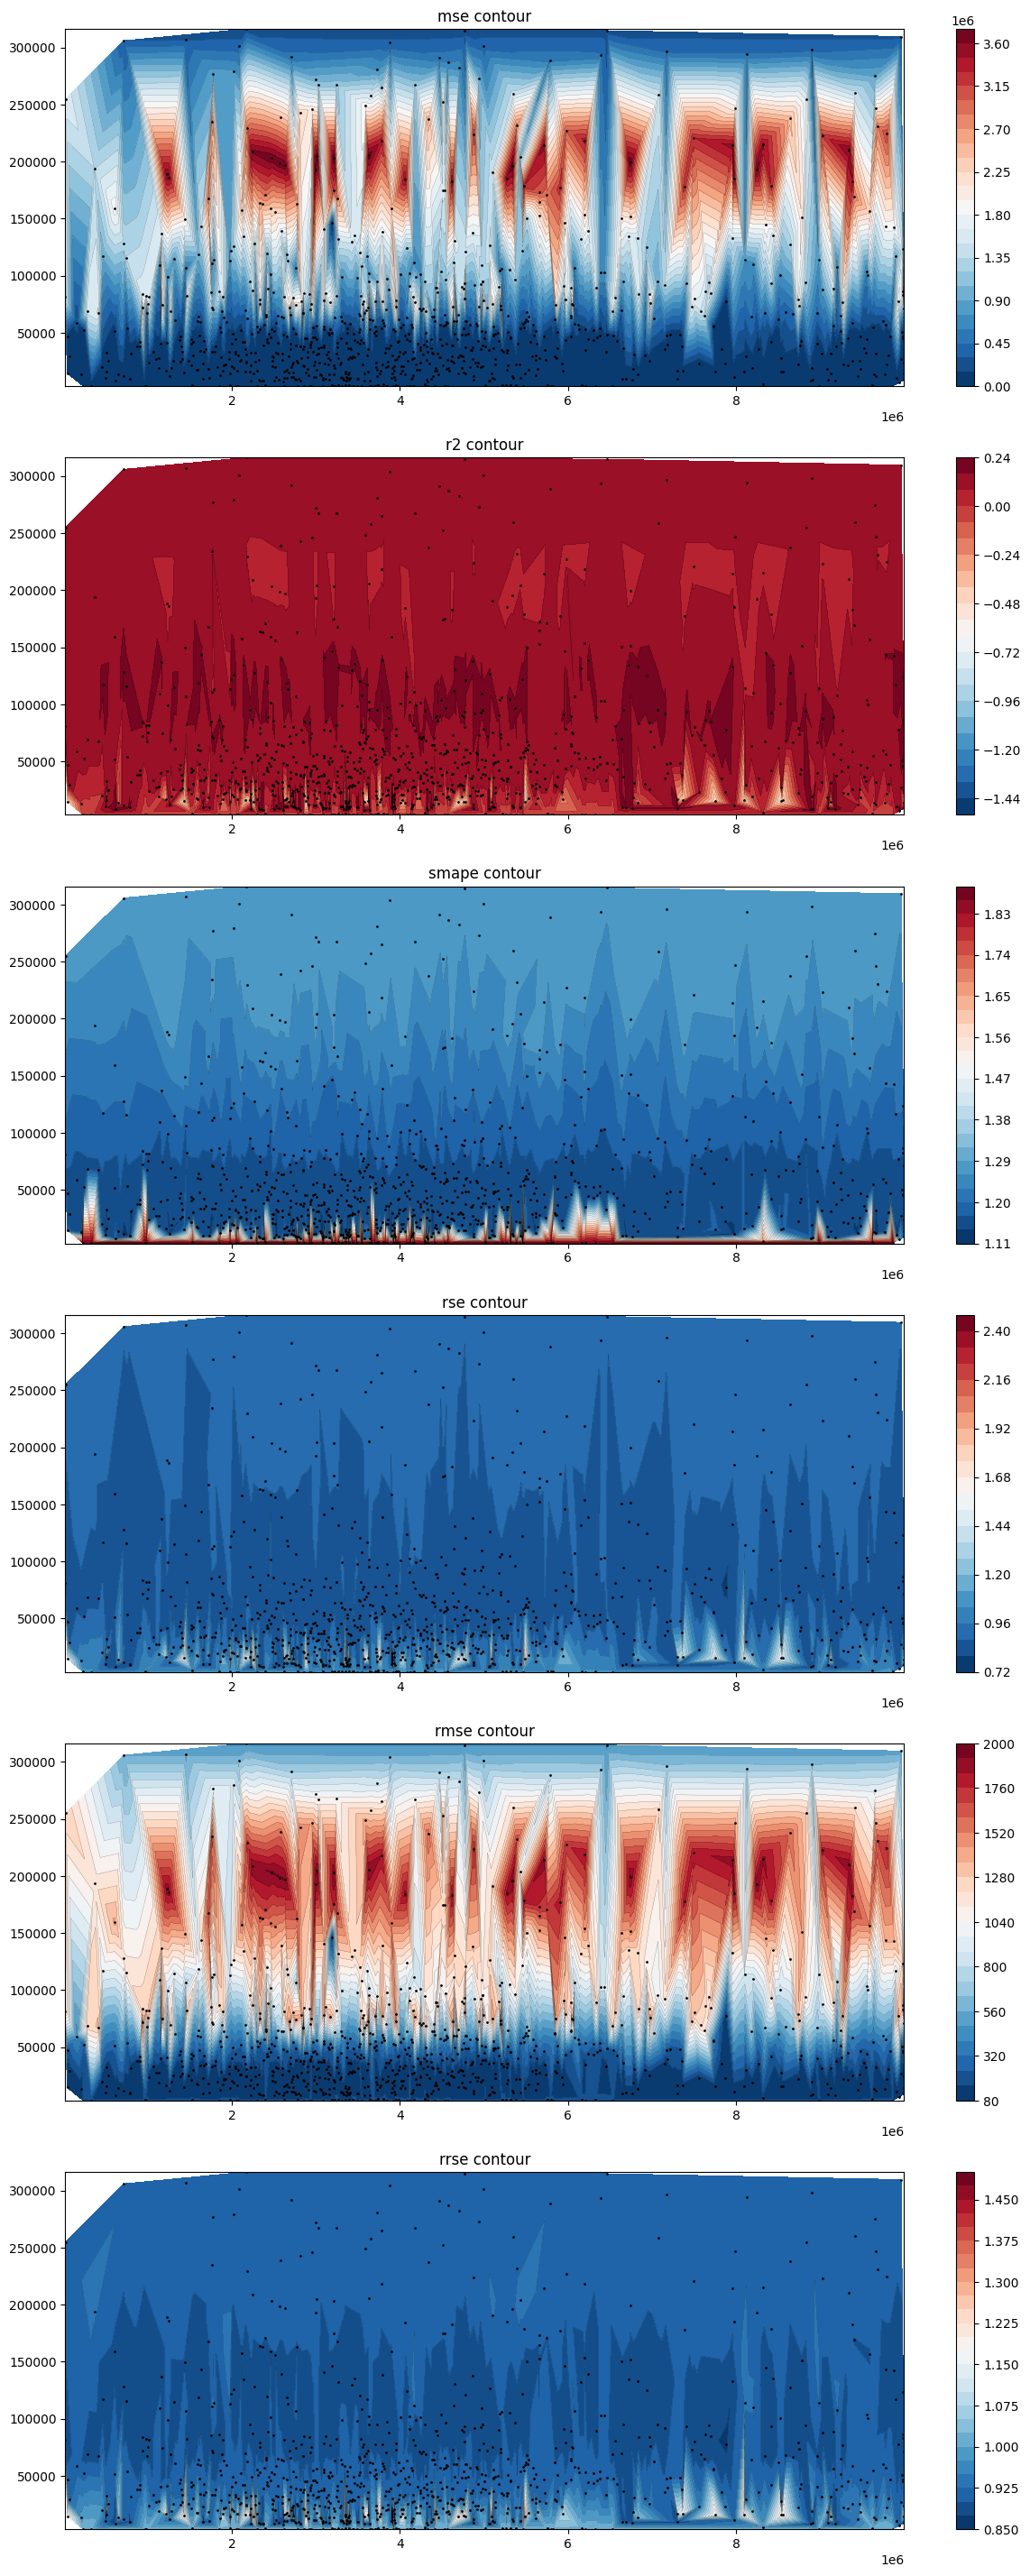

In [25]:
def chart_config_loss(df, losses=['mse']):
    num_plts = len(losses)
    fig = plt.figure(figsize=(15, 6*num_plts))
    for i, loss in enumerate(losses, 1):
        ax = plt.subplot(num_plts, 1, i)
        # plt.tricontour(df['config/kernel/C'], df['config/kernel/sigma'], df[loss], levels=14, linewidths=0.5, colors='k')
        # z = plt.tricontourf(df['config/kernel/C'], df['config/kernel/sigma'], df[loss], levels=14, cmap="RdBu_r")
        # plt.tricontour(df['config/C'], df['config/kernel/sigma'], df[loss], levels=14, linewidths=0.5, colors='k')
        # z = plt.tricontourf(df['config/C'], df['config/kernel/sigma'], df[loss], levels=14, cmap="RdBu_r")
        plt.tricontour(df['config/params/C'], df['config/params/sigma'], df[loss], levels=24, linewidths=0.1, colors='k')
        z = plt.tricontourf(df['config/params/C'], df['config/params/sigma'], df[loss], levels=24, cmap="RdBu_r")
        plt.plot(df['config/params/C'], df['config/params/sigma'], 'ko', ms=1)
        # plt.xscale('log')
        # plt.yscale('log')
        plt.colorbar(z, ax=ax)
    #     plt.plot(df['config/C'], df['config/kernel/sigma'], 'ko', ms=3)
        plt.title(f'{loss} contour')
    plt.show()
#     plt.savefig("loss_chart.png")
chart_config_loss(result_df, ['mse','r2','smape', 'rse', 'rmse', 'rrse'])